## Models Testing and comparaisons

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import _tree
from sklearn.metrics import confusion_matrix

from FCM_SS import FCM_SS

import matplotlib.pyplot as plt
import itertools
import copy
import numpy as np

DATASETS_PATHS = ['datasets/melanomaTest.dat.csv', 'datasets/seeds_dataset.csv'] # http://cibcb.org/data/

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Loading datasets

In [2]:
def loadDataset(filename):
    dataset = np.genfromtxt(filename, delimiter=';')
    
    # save all the labels to calculate the performance of our algorithm
    true_labels = copy.copy(dataset[:, -1])
    labels_names = np.unique(true_labels)
    
    return dataset, true_labels, labels_names

DATASETS = []
for path in DATASETS_PATHS:
    DATASETS.append(loadDataset(path))


## Remove some labels

In [3]:
def removeLabels(dataset, labels_name, percentage):  
    result = copy.copy(dataset)
    # remove percentage of each different labels for test purpose       
    for label in labels_name:
        subArrayIdx = np.where(result[:,-1] == label)[0]
        idx = np.random.choice(subArrayIdx, int(len(subArrayIdx)*percentage/100), replace=False)
        for i in idx:
            result[i][-1] = 0
            

    return result
#for dataset in DATASETS:
#    dataset[0] = removeLabels(dataset[0], dataset[2], 50)

## Perform Tests

In [4]:
fcm = FCM_SS() 
fcm.setParams(fuzzy_param=2, membership_threshold=0.95)
labels, centers, mb = fcm.clusterize(DATASETS[1][0], DATASETS[1][2])

/Users/francoisquellec/Documents/HEIG-VD/3eme Annee - 2017-2018/2eme semestre/Logique Flou et Applications/LFA_Labs/LFA Project/FCM_SS.py:49: RuntimeWarning: invalid value encountered in double_scalars
  res[cluster][0] /= c_total
/Users/francoisquellec/Documents/HEIG-VD/3eme Annee - 2017-2018/2eme semestre/Logique Flou et Applications/LFA_Labs/LFA Project/FCM_SS.py:50: RuntimeWarning: invalid value encountered in double_scalars
  res[cluster][1] /= c_total


### Confusion Matrix and scores

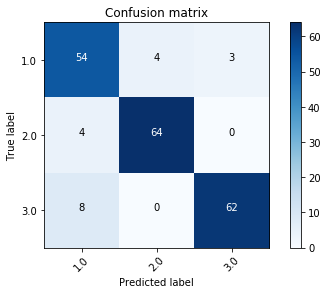

In [5]:

conf_mat = confusion_matrix(labels, DATASETS[1][1])
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(DATASETS[1][2]))
    plt.xticks(tick_marks, DATASETS[1][2], rotation=45)
    plt.yticks(tick_marks, DATASETS[1][2])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
plot_confusion_matrix(conf_mat)

In [6]:
print("Accuracy:", accuracy_score(labels, DATASETS[1][1]))
precision = (conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0]) + conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1]))/2
print("Precision: ", precision)
recall = (conf_mat[0][0]/(conf_mat[0][0] + conf_mat[0][1]) + conf_mat[1][1]/(conf_mat[1][1] + conf_mat[1][0]))/2
print("Recall: ", recall)
f1score = 2*(precision*recall)/(precision+recall)
print("F1-Score: ", f1score)

Accuracy: 0.9045226130653267
Precision:  0.936105476673428
Recall:  0.936105476673428
F1-Score:  0.936105476673428


0.9095477386934674


/Users/francoisquellec/Documents/HEIG-VD/3eme Annee - 2017-2018/2eme semestre/Logique Flou et Applications/LFA_Labs/LFA Project/FCM_SS.py:49: RuntimeWarning: invalid value encountered in double_scalars
  res[cluster][0] /= c_total
/Users/francoisquellec/Documents/HEIG-VD/3eme Annee - 2017-2018/2eme semestre/Logique Flou et Applications/LFA_Labs/LFA Project/FCM_SS.py:50: RuntimeWarning: invalid value encountered in double_scalars
  res[cluster][1] /= c_total
/Users/francoisquellec/Documents/HEIG-VD/3eme Annee - 2017-2018/2eme semestre/Logique Flou et Applications/LFA_Labs/LFA Project/FCM_SS.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  inv_distances = np.reciprocal(nonzero_distances)**(1/(m - 1))
/Users/francoisquellec/Documents/HEIG-VD/3eme Annee - 2017-2018/2eme semestre/Logique Flou et Applications/LFA_Labs/LFA Project/FCM_SS.py:27: RuntimeWarning: invalid value encountered in true_divide
  return inv_distances.T/np.sum(inv_distances, axis=1)


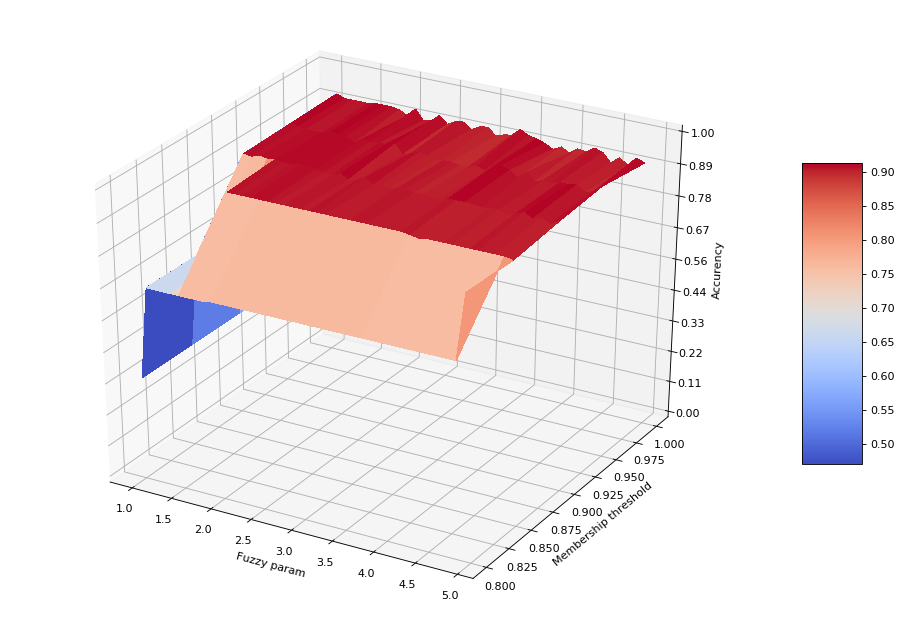

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


dataset = DATASETS[1][0]
true_labels = DATASETS[1][1]
labels_names = DATASETS[1][2]

fuzzy_params = np.arange(1,5,0.1)
mb_threshold_values = np.arange(0.8,1.05,0.05)

def computeClustering(fuzzy_param, mb_threshold_value):
    fcm.setParams(fuzzy_param=fuzzy_param, membership_threshold=mb_threshold_value)
    labels, centers, mb = fcm.clusterize(dataset, labels_names)
    return accuracy_score(labels, true_labels)

print(computeClustering(2, 0.95))
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')

# Make data.
fuzzy_params, mb_threshold_values = np.meshgrid(fuzzy_params, mb_threshold_values)

accurencies = np.array([computeClustering(x,y) for x,y in zip(np.ravel(fuzzy_params), np.ravel(mb_threshold_values))])
accurencies = accurencies.reshape(mb_threshold_values.shape)

graph = ax.plot_surface(fuzzy_params, mb_threshold_values, accurencies, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('Fuzzy param')
ax.set_ylabel('Membership threshold')
ax.set_zlabel('Accurency')

# Customize the z axis.
ax.set_zlim(0, 1.00)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(graph, shrink=0.5, aspect=5)

plt.show()

/Users/francoisquellec/Documents/HEIG-VD/3eme Annee - 2017-2018/2eme semestre/Logique Flou et Applications/LFA_Labs/LFA Project/FCM_SS.py:49: RuntimeWarning: invalid value encountered in double_scalars
  res[cluster][0] /= c_total
/Users/francoisquellec/Documents/HEIG-VD/3eme Annee - 2017-2018/2eme semestre/Logique Flou et Applications/LFA_Labs/LFA Project/FCM_SS.py:50: RuntimeWarning: invalid value encountered in double_scalars
  res[cluster][1] /= c_total


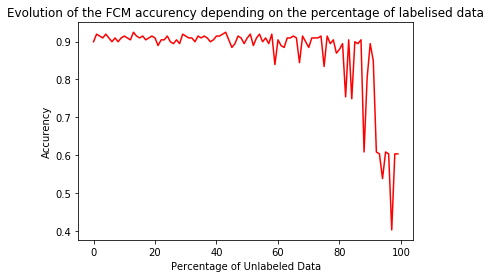

In [15]:


def computeClustering(percentageOmission):
    dataset = DATASETS[1][0]
    true_labels = DATASETS[1][1]
    labels_names = DATASETS[1][2]
    dataset = removeLabels(dataset, labels_names, percentageOmission) 
    fcm.setParams(fuzzy_param=2, membership_threshold=0.975)
    labels, centers, mb = fcm.clusterize(dataset, labels_names)
    return accuracy_score(labels, true_labels)

labelOmission = np.arange(0, 100)
accurencies = np.array([computeClustering(x) for x in labelOmission])

fig, axes = plt.subplots()

axes.plot(labelOmission, accurencies, 'r')
axes.set_xlabel('Percentage of Unlabeled Data')
axes.set_ylabel('Accurency')
axes.set_title('Evolution of the FCM accurency depending on the percentage of labelised data');